In [ ]:
import pandas as pd 

data = pd.read_csv('no_show.csv')

# print(data.info())
print(data.head())

: 

   no_show                            Patient ID  \
0    False  649e3901-e56b-41d9-b2d3-f61ce708a415   
1    False  3028fd02-a20a-4233-ac16-b571dde4540c   
2    False  09ba4ce7-3ee5-4e2d-90c7-16bd5302332f   
3    False  eaac1296-984d-4528-a4c6-1284dfcf3338   
4    False  ed2995c0-c4f5-49ad-9607-3ba6b3abed1b   

                         Appointment ID Gender  Age Alcohol Consumption  \
0  659a5257-c2f0-4eda-a2bb-ebc4bd9ce4e4      F   43              5/week   
1  7ae6e7f8-3788-48d2-9fbc-11114ec28bfe      F   37              0/week   
2  e1374c85-b05b-414d-9868-7b740058ce46      F   54           > 14/week   
3  bb4c0fa2-2f01-4c49-a139-b480228bcecf      F   17              0/week   
4  308ee03b-829f-4aab-b22a-62ccfff8e938      F   28              5/week   

   Hypertension  Diabetes     Appointment Date        Schedule Date  \
0         False     False  2021-01-14T10:30:00  2020-10-26T00:00:00   
1         False      True  2021-02-17T14:00:00  2021-01-25T00:00:00   
2         False     Fal

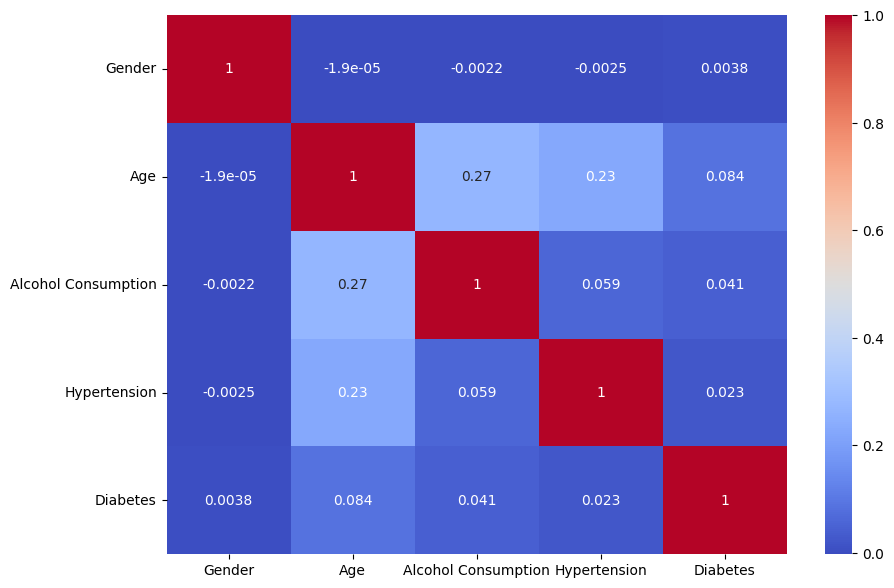

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('no_show.csv')

# Display the first few rows of the data
print(data.head())

# Encode categorical variables
# Convert 'Gender' to numerical values
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})

# Handle Alcohol Consumption as categorical variable
data['Alcohol Consumption'] = data['Alcohol Consumption'].map({
    '0/week': 0,
    '5/week': 1,
    '> 14/week': 2
})

# Convert boolean columns to integer
data['Hypertension'] = data['Hypertension'].astype(int)
data['Diabetes'] = data['Diabetes'].astype(int)

# Drop columns that are not needed for numeric analysis
# Assuming 'Patient ID', 'Appointment ID', 'Appointment Date', 'Schedule Date', 'Appointment Reason', 'Clinic Location' are not needed
numeric_data = data.drop(['Patient ID', 'Appointment ID', 'Appointment Date', 'Schedule Date', 'Appointment Reason', 'Clinic Location'], axis=1)

# Ensure all columns are numeric
print(numeric_data.dtypes)  # Check the data types of all columns

# If there are still non-numeric columns, they should be handled here
# For example, convert any remaining non-numeric columns to numeric or exclude them
numeric_data = numeric_data.select_dtypes(include=[int, float])  # Keep only numeric columns

# Correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot
# Ensure 'No Show' is included in the pairplot and is numeric
numeric_data['No Show'] = data['no_show'].astype(int)  # Convert 'no_show' to integer if needed
# sns.pairplot(numeric_data, hue='No Show')
# plt.show()



In [10]:
numeric_data.head()


,Gender,Age,Alcohol Consumption,Hypertension,Diabetes,No Show
0,1,43,1.0,0,0,0
1,1,37,0.0,0,1,0
2,1,54,2.0,0,0,0
3,1,17,0.0,0,0,0
4,1,28,1.0,0,0,0


In [12]:
numeric_data['Age_Group'] = pd.cut(numeric_data['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])

# Generate dummy variables for the age groups
numeric_data = pd.get_dummies(numeric_data, columns=['Age_Group'], drop_first=True)

# Display the updated DataFrame
print(numeric_data.head())

   Gender  Age  Alcohol Consumption  Hypertension  Diabetes  No Show  \
0       1   43                  1.0             0         0        0   
1       1   37                  0.0             0         1        0   
2       1   54                  2.0             0         0        0   
3       1   17                  0.0             0         0        0   
4       1   28                  1.0             0         0        0   

   Age_Group_30-40  Age_Group_40-50  Age_Group_50-60  Age_Group_>60  
0            False             True            False          False  
1             True            False            False          False  
2            False            False             True          False  
3            False            False            False          False  
4            False            False            False          False  


In [13]:
from sklearn.model_selection import train_test_split

X = numeric_data.drop(['No Show'],axis='columns')
y = numeric_data['No Show']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[15333     6]
 [  661     0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15339
           1       0.00      0.00      0.00       661

    accuracy                           0.96     16000
   macro avg       0.48      0.50      0.49     16000
weighted avg       0.92      0.96      0.94     16000



In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  10.4s
[CV] END m